In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Предварительная обработка данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


In [4]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
# Заполняем пропуски в столбце Rating медианой по категориям 
df['Rating'].fillna(df.groupby('Category')['Rating'].transform('median'), inplace=True)

### Задача 1
Исследуем, какие оценки чаще всего выставляются приложениям

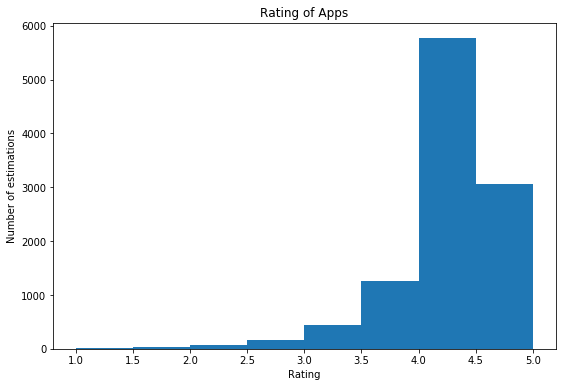

In [6]:
plt.figure(figsize=(9,6))
plt.hist(df['Rating'], range = (1,5), bins=8)
plt.xlabel('Rating')
plt.ylabel('Number of estimations')
plt.title('Rating of Apps')
plt.show()

Из гистограммы видно, что большинство приложений в Google Play Store имеют рейтинг от 4 до 4.5.

In [7]:
# Удаляем из датасета строку с ошибочной категорией
df.drop(df[df['Category'] == '1.9'].index, inplace=True)

In [8]:
# изменяем тип столбцов reviews, installs, price, size на числовой
df['Reviews'] = df['Reviews'].astype('int64')

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: float(x))

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 846.9+ KB


### Задача 2
Определяем, в каких категориях больше всего приложений

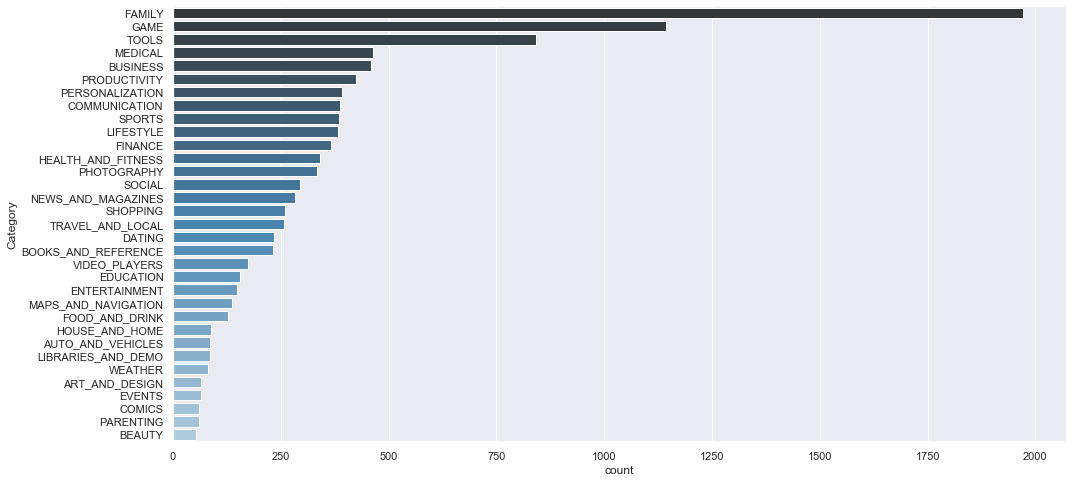

In [10]:
plt.figure(figsize=(16,8))
sns.set(style='darkgrid')
sns.countplot(y='Category', data=df, palette='Blues_d', order = df['Category'].value_counts().sort_values(ascending=False).index)
plt.show()

### Задача 3
Приложения из каких категорий чаще всего инсталлируют - топ 10 

In [11]:
top_category_installs = df.groupby('Category')[['Installs']].sum().sort_values('Installs', ascending=False).head(10)
top_category_installs

,Installs
Category,
GAME,3.508602e+10
COMMUNICATION,3.264728e+10
PRODUCTIVITY,1.417609e+10
SOCIAL,1.406987e+10
TOOLS,1.145277e+10
FAMILY,1.025826e+10
PHOTOGRAPHY,1.008825e+10
NEWS_AND_MAGAZINES,7.496318e+09
TRAVEL_AND_LOCAL,6.868887e+09


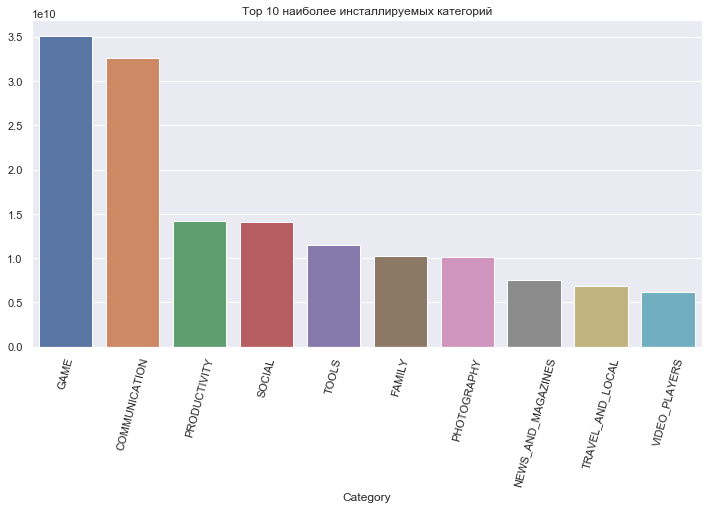

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(top_category_installs.index, top_category_installs.Installs)

plt.title('Top 10 наиболее инсталлируемых категорий')
plt.xticks(rotation=75)
plt.ylabel(None)
plt.xlabel('Category')
plt.show()

Из графика видно, что с большим отрывом лидируют игры и приложения для коммуникаций. 

### Задача 4
Определяем, зависит ли от каких-то параметров количество инсталляций

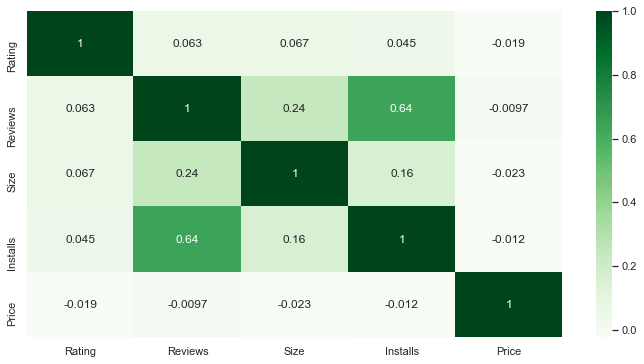

In [13]:
#Тепловая карта коэффициентов корреляции датасета
plt.figure(figsize=(12,6))
p = sns.heatmap(df.corr(), annot=True, cmap='Greens')

Наилучшая корреляция наблюдается между количеством инсталляций и количеством отзывов. При этом количество инсталляций мало зависит от рейтинга приложения.

### Еще несколько распределений

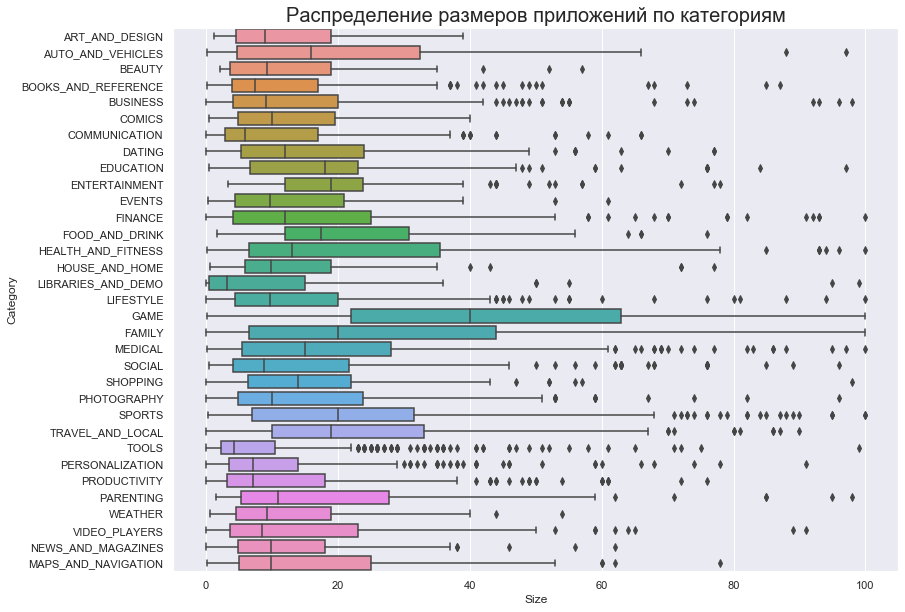

In [14]:
plt.figure(figsize=(13,10))
ax = sns.boxplot(x=df['Size'], y=df['Category'], notch=False)
ax.set_title('Распределение размеров приложений по категориям', size = 20)
plt.show()

Лидерами по размеру, а также разбросу размеров приложений являются категории Game и Family. Самые маленькие приложения с наименьшим разбросом размеров находятся в категории Tools. С другой стороны, здесь много вылетающих значений. В большинстве категорий медиана смещена влево.

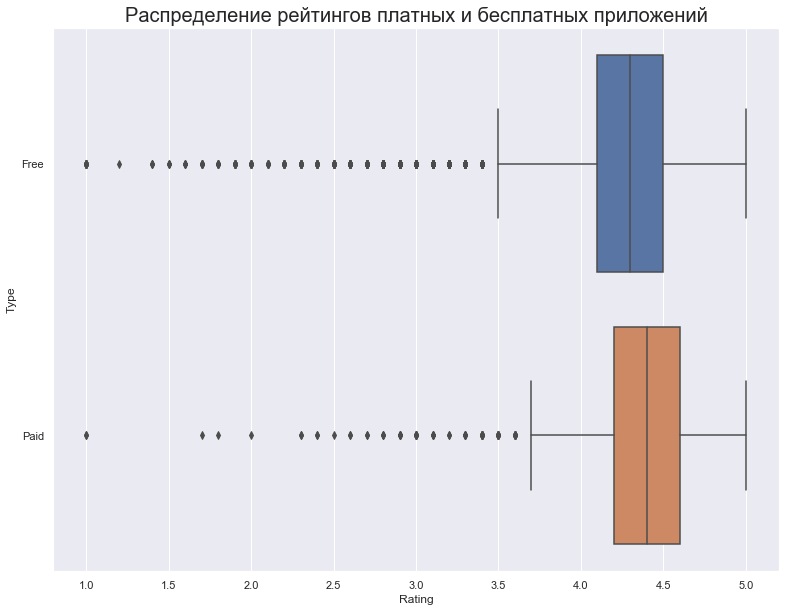

In [15]:
plt.figure(figsize=(13,10))
ax = sns.boxplot(x=df['Rating'], y=df['Type'], notch=False)
ax.set_title('Распределение рейтингов платных и бесплатных приложений', size = 20)
plt.show()

Медианное значение рейтингов бесплатных приложений немного ниже, чем у платных.